In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [2]:
#Vemos como es nuestro data set
pd.options.display.max_columns = 21
data_frame = pd.read_csv('datasets_train.csv')
data_frame.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
#Comprobamos cuales son los tipos de las caracteristicas
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

En principio parecen todas numericas. Vamos a ver como están distribuidas

In [4]:
data_frame.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Si habia que normalizarlas/escalarlas.

Vemos con este análisis que las variables categoricas son:

*  Bluetooh
*  Dual sim
*  4G
*  3G
*  Pantalla tactil
*  Wifi

<AxesSubplot:>

<Figure size 3240x1944 with 0 Axes>

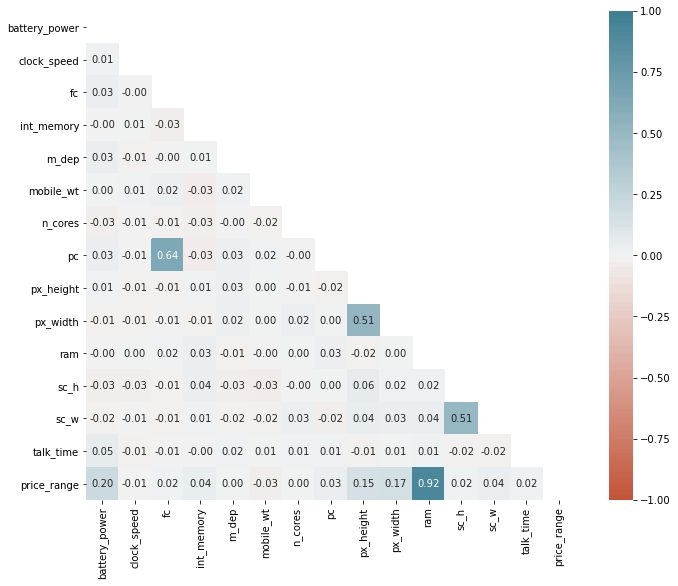

In [5]:
# Calcula coeficiente de correlación de Pearson

df_no_categor = data_frame[['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range']]
corr = df_no_categor.corr(method ='pearson') #por defecto Pearson ¿existe relación lineal entre variables?

plt.figure(figsize=(45,27))
#Mostramos solo la diagonal inferior.
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr,mask=mask,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True, fmt=".2f")
#plt.savefig('correlation.png')

In [6]:
#Comprobamos la distribucion de las caracteristicas en función al precio
df_cs = data_frame.groupby(["price_range"],as_index=False).mean()
df_cs

,price_range,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0,1116.902,0.486,1.5502,0.500,4.084,0.518,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,1,1228.868,0.490,1.4886,0.510,4.340,0.524,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.490,12.212,5.544,11.362,0.756,0.522,0.504
2,2,1228.320,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,3,1379.984,0.518,1.5204,0.530,4.316,0.550,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


Se observa que la variable ram es la más relacionada con el precio

C:\Users\jandr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

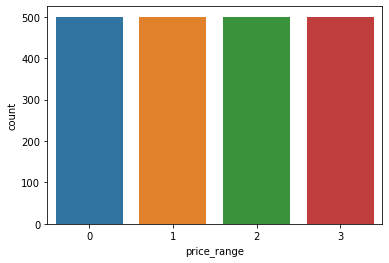

In [7]:
#Vamos a comprobar si los datos en relación al precio están balanceados para el entrenamiento.
sns.countplot(data_frame['price_range'])

# Clasificación con SVM

Hacemos una pequeña prueba con dos variable que tienen correlación con el precion para ver como están distribuidas y si el algorimto SVM podria crear un plano para clasificar.

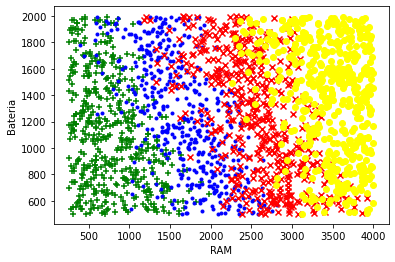

In [8]:
df0 = data_frame[data_frame['price_range'] == 0]
df1 = data_frame[data_frame['price_range'] == 1]
df2 = data_frame[data_frame['price_range'] == 2]
df3 = data_frame[data_frame['price_range'] == 3]
%matplotlib inline


plt.xlabel('RAM')
plt.ylabel('Bateria')
plt.scatter(df0['ram'], df0['battery_power'],color="green",marker='+')
plt.scatter(df1['ram'], df1['battery_power'],color="blue",marker='.')
plt.scatter(df2['ram'], df2['battery_power'],color="red",marker='x')
plt.scatter(df3['ram'], df3['battery_power'],color="yellow",marker='o')

Parece que los datos están bastante distribuidos posiblitando la creación de los planos para SVM.
Creamos ahora las variables para el entrenamiento. Posiblemente la mejor opción para este tipo de datos va a ser el kernel lineal.

In [9]:
#Preparamos los datos para su entrenamiento.
X = data_frame.drop(['price_range'], axis='columns')
y = data_frame.price_range


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [11]:
from sklearn.svm import SVC, LinearSVC


model = SVC(C=0.001)
kf = KFold(n_splits=5)
model.fit(X_train, y_train)
score = model.score(X_train,y_train)
print("Metrica del modelo", score)

scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())
y_preds = model.predict(X_test)
score_pred = metrics.accuracy_score(y_test, y_preds)
print("Metrica en Test", score_pred)

Metrica del modelo 0.25875
Metricas cross_validation [0.24375  0.271875 0.2375   0.246875 0.225   ]
Media de cross_validation 0.24500000000000002
Metrica en Test 0.215


In [12]:
model = SVC(C=0.01)
kf = KFold(n_splits=5)
model.fit(X_train, y_train)
score = model.score(X_train,y_train)
print("Metrica del modelo", score)

scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())
y_preds = model.predict(X_test)
score_pred = metrics.accuracy_score(y_test, y_preds)
print("Metrica en Test", score_pred)


Metrica del modelo 0.595625
Metricas cross_validation [0.546875 0.56875  0.478125 0.546875 0.4875  ]
Media de cross_validation 0.525625
Metrica en Test 0.5475


In [13]:
model = SVC(C=0.1)
kf = KFold(n_splits=5)
model.fit(X_train, y_train)
score = model.score(X_train,y_train)
print("Metrica del modelo", score)

scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())
y_preds = model.predict(X_test)
score_pred = metrics.accuracy_score(y_test, y_preds)
print("Metrica en Test", score_pred)

Metrica del modelo 0.90875
Metricas cross_validation [0.8875   0.903125 0.884375 0.903125 0.903125]
Media de cross_validation 0.89625
Metrica en Test 0.91


In [14]:
model = SVC(kernel='rbf', gamma=0.9, C=0.1)
kf = KFold(n_splits=5)
model.fit(X_train, y_train)
score = model.score(X_train,y_train)
print("Metrica del modelo", score)

scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="accuracy")
print("Metricas cross_validation", scores)
print("Media de cross_validation", scores.mean())
pred_rbf = model.predict(X_test)
score_pred = metrics.accuracy_score(y_test, pred_rbf)
print("Metrica en Test", score_pred)

Metrica del modelo 0.25875
Metricas cross_validation [0.24375  0.271875 0.2375   0.246875 0.225   ]
Media de cross_validation 0.24500000000000002
Metrica en Test 0.215


In [15]:
# Mostrar confusion matrix
print(metrics.confusion_matrix(y_test, pred_rbf))

# Mostrar precision and recall, junto con el resto de métricas
print(metrics.classification_report(y_test, pred_rbf, digits=3))

[[  0   0   0 101]
 [  0   0   0 109]
 [  0   0   0 104]
 [  0   0   0  86]]
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       101
           1      0.000     0.000     0.000       109
           2      0.000     0.000     0.000       104
           3      0.215     1.000     0.354        86

    accuracy                          0.215       400
   macro avg      0.054     0.250     0.088       400
weighted avg      0.046     0.215     0.076       400



C:\Users\jandr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jandr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jandr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Mostrar confusion matrix
print(metrics.confusion_matrix(y_test, y_preds))

# Mostrar precision and recall, junto con el resto de métricas
print(metrics.classification_report(y_test, y_preds, digits=3))

[[100   1   0   0]
 [  9  95   5   0]
 [  0   5  91   8]
 [  0   0   8  78]]
              precision    recall  f1-score   support

           0      0.917     0.990     0.952       101
           1      0.941     0.872     0.905       109
           2      0.875     0.875     0.875       104
           3      0.907     0.907     0.907        86

    accuracy                          0.910       400
   macro avg      0.910     0.911     0.910       400
weighted avg      0.910     0.910     0.910       400



Se aprecia que el kernel lineal obtiene unos resultados mucho mejores. 
Estos resultados nos ilustran como algunos kernels funcionan mejor para algunos conjuntos de datos.
Concretamente para este data set el kernel lineal funciona mucho mejor que con el kernel radial. El modelo predice todos clase 1.
Esto es un de los inconvenientes de SVM, estar probando los distintos kernel para ver cual funciona mejor.

Comprobamos la hipotesis de la separación lineal de nuestros datos que obtuvimos mostrando la grafica de bateria y ram.

# Clasificador con Redes Neuronales

Ahora con los mismos datos entrenaremos un modelo basado en redes nueronales. El primer modelo tendrá una capa oculta con 4 neuronas y el segundo tendrá una capa oculta con 3 neuronas.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
from sklearn.preprocessing import StandardScaler

sntandar_scaler = StandardScaler()
sntandar_scaler.fit(X_train)

X_train = sntandar_scaler.transform(X_train)

X_test = sntandar_scaler.transform(X_test)

In [19]:
model = MLPClassifier(max_iter=2000)
model.activation = 'logistic'
model.solver = 'adam'
model.verbose = True
model.learning_rate_init = 0.001
#model.hidden_layer_sizes = (20,3,4)
model.hidden_layer_sizes = (4)


In [20]:
model.fit(X_train, y_train)

Iteration 1, loss = 1.42909652
Iteration 2, loss = 1.42248217
Iteration 3, loss = 1.41662040
Iteration 4, loss = 1.41056077
Iteration 5, loss = 1.40551411
Iteration 6, loss = 1.40064676
Iteration 7, loss = 1.39603241
Iteration 8, loss = 1.39217703
Iteration 9, loss = 1.38810150
Iteration 10, loss = 1.38442380
Iteration 11, loss = 1.38097980
Iteration 12, loss = 1.37769721
Iteration 13, loss = 1.37458301
Iteration 14, loss = 1.37144602
Iteration 15, loss = 1.36842254
Iteration 16, loss = 1.36556581
Iteration 17, loss = 1.36268790
Iteration 18, loss = 1.35973357
Iteration 19, loss = 1.35694043
Iteration 20, loss = 1.35413877
Iteration 21, loss = 1.35119777
Iteration 22, loss = 1.34852618
Iteration 23, loss = 1.34553803
Iteration 24, loss = 1.34251218
Iteration 25, loss = 1.33962350
Iteration 26, loss = 1.33650294
Iteration 27, loss = 1.33344311
Iteration 28, loss = 1.33030393
Iteration 29, loss = 1.32720332
Iteration 30, loss = 1.32387690
Iteration 31, loss = 1.32059120
Iteration 32, los

Iteration 258, loss = 0.60283573
Iteration 259, loss = 0.60131469
Iteration 260, loss = 0.59983004
Iteration 261, loss = 0.59833201
Iteration 262, loss = 0.59684552
Iteration 263, loss = 0.59538818
Iteration 264, loss = 0.59389413
Iteration 265, loss = 0.59239791
Iteration 266, loss = 0.59101525
Iteration 267, loss = 0.58951863
Iteration 268, loss = 0.58802588
Iteration 269, loss = 0.58668883
Iteration 270, loss = 0.58516807
Iteration 271, loss = 0.58370859
Iteration 272, loss = 0.58226064
Iteration 273, loss = 0.58085575
Iteration 274, loss = 0.57940987
Iteration 275, loss = 0.57800608
Iteration 276, loss = 0.57658973
Iteration 277, loss = 0.57523681
Iteration 278, loss = 0.57375746
Iteration 279, loss = 0.57236445
Iteration 280, loss = 0.57097263
Iteration 281, loss = 0.56958273
Iteration 282, loss = 0.56819128
Iteration 283, loss = 0.56682401
Iteration 284, loss = 0.56546843
Iteration 285, loss = 0.56404533
Iteration 286, loss = 0.56266518
Iteration 287, loss = 0.56128252
Iteration 

Iteration 513, loss = 0.33052328
Iteration 514, loss = 0.32984031
Iteration 515, loss = 0.32909952
Iteration 516, loss = 0.32838953
Iteration 517, loss = 0.32766987
Iteration 518, loss = 0.32693998
Iteration 519, loss = 0.32620674
Iteration 520, loss = 0.32549647
Iteration 521, loss = 0.32476759
Iteration 522, loss = 0.32408641
Iteration 523, loss = 0.32333716
Iteration 524, loss = 0.32267089
Iteration 525, loss = 0.32194482
Iteration 526, loss = 0.32122084
Iteration 527, loss = 0.32052778
Iteration 528, loss = 0.31987820
Iteration 529, loss = 0.31913588
Iteration 530, loss = 0.31841873
Iteration 531, loss = 0.31775387
Iteration 532, loss = 0.31704040
Iteration 533, loss = 0.31637727
Iteration 534, loss = 0.31568410
Iteration 535, loss = 0.31498105
Iteration 536, loss = 0.31426837
Iteration 537, loss = 0.31359895
Iteration 538, loss = 0.31293196
Iteration 539, loss = 0.31224348
Iteration 540, loss = 0.31155213
Iteration 541, loss = 0.31086687
Iteration 542, loss = 0.31019111
Iteration 

Iteration 764, loss = 0.19417840
Iteration 765, loss = 0.19382013
Iteration 766, loss = 0.19346361
Iteration 767, loss = 0.19301094
Iteration 768, loss = 0.19263227
Iteration 769, loss = 0.19225307
Iteration 770, loss = 0.19185968
Iteration 771, loss = 0.19149755
Iteration 772, loss = 0.19110161
Iteration 773, loss = 0.19071829
Iteration 774, loss = 0.19036498
Iteration 775, loss = 0.19001628
Iteration 776, loss = 0.18958078
Iteration 777, loss = 0.18920276
Iteration 778, loss = 0.18885338
Iteration 779, loss = 0.18848510
Iteration 780, loss = 0.18810720
Iteration 781, loss = 0.18771804
Iteration 782, loss = 0.18736431
Iteration 783, loss = 0.18699848
Iteration 784, loss = 0.18665563
Iteration 785, loss = 0.18625404
Iteration 786, loss = 0.18587477
Iteration 787, loss = 0.18551133
Iteration 788, loss = 0.18514241
Iteration 789, loss = 0.18479571
Iteration 790, loss = 0.18441046
Iteration 791, loss = 0.18403984
Iteration 792, loss = 0.18370997
Iteration 793, loss = 0.18333207
Iteration 

Iteration 1015, loss = 0.12363952
Iteration 1016, loss = 0.12346460
Iteration 1017, loss = 0.12330498
Iteration 1018, loss = 0.12303613
Iteration 1019, loss = 0.12286971
Iteration 1020, loss = 0.12268313
Iteration 1021, loss = 0.12251212
Iteration 1022, loss = 0.12232569
Iteration 1023, loss = 0.12208941
Iteration 1024, loss = 0.12194197
Iteration 1025, loss = 0.12171342
Iteration 1026, loss = 0.12153284
Iteration 1027, loss = 0.12134798
Iteration 1028, loss = 0.12117754
Iteration 1029, loss = 0.12096900
Iteration 1030, loss = 0.12076792
Iteration 1031, loss = 0.12061326
Iteration 1032, loss = 0.12043536
Iteration 1033, loss = 0.12029097
Iteration 1034, loss = 0.12002440
Iteration 1035, loss = 0.11986279
Iteration 1036, loss = 0.11971434
Iteration 1037, loss = 0.11948714
Iteration 1038, loss = 0.11929231
Iteration 1039, loss = 0.11912973
Iteration 1040, loss = 0.11897180
Iteration 1041, loss = 0.11877686
Iteration 1042, loss = 0.11857339
Iteration 1043, loss = 0.11842417
Iteration 1044

Iteration 1256, loss = 0.08920731
Iteration 1257, loss = 0.08907433
Iteration 1258, loss = 0.08898357
Iteration 1259, loss = 0.08890858
Iteration 1260, loss = 0.08878931
Iteration 1261, loss = 0.08871887
Iteration 1262, loss = 0.08859815
Iteration 1263, loss = 0.08847207
Iteration 1264, loss = 0.08842202
Iteration 1265, loss = 0.08826422
Iteration 1266, loss = 0.08818829
Iteration 1267, loss = 0.08805103
Iteration 1268, loss = 0.08797407
Iteration 1269, loss = 0.08786880
Iteration 1270, loss = 0.08778693
Iteration 1271, loss = 0.08773303
Iteration 1272, loss = 0.08759085
Iteration 1273, loss = 0.08746740
Iteration 1274, loss = 0.08733559
Iteration 1275, loss = 0.08726752
Iteration 1276, loss = 0.08717126
Iteration 1277, loss = 0.08708398
Iteration 1278, loss = 0.08698483
Iteration 1279, loss = 0.08689423
Iteration 1280, loss = 0.08681124
Iteration 1281, loss = 0.08668279
Iteration 1282, loss = 0.08660322
Iteration 1283, loss = 0.08657125
Iteration 1284, loss = 0.08644106
Iteration 1285

MLPClassifier(activation='logistic', hidden_layer_sizes=4, max_iter=2000,
              verbose=True)

In [21]:
nn_preds = model.predict(X_test)

In [22]:
# Mostrar confusion matrix
print(metrics.confusion_matrix(y_test, nn_preds))

# Mostrar precision and recall, junto con el resto de métricas
print(metrics.classification_report(y_test, nn_preds, digits=3))

[[ 95   1   0   0]
 [  3  99   3   0]
 [  0   0  93   5]
 [  0   0   0 101]]
              precision    recall  f1-score   support

           0      0.969     0.990     0.979        96
           1      0.990     0.943     0.966       105
           2      0.969     0.949     0.959        98
           3      0.953     1.000     0.976       101

    accuracy                          0.970       400
   macro avg      0.970     0.970     0.970       400
weighted avg      0.970     0.970     0.970       400



In [23]:

model2 = MLPClassifier(max_iter=2000)
model2.activation = 'logistic'
model2.solver = 'adam'
model2.verbose = True
model2.learning_rate_init = 0.001
#model.hidden_layer_sizes = (20,3,4)
model2.hidden_layer_sizes = (3)

In [24]:
model2.fit(X_train, y_train)

Iteration 1, loss = 1.41174122
Iteration 2, loss = 1.40807974
Iteration 3, loss = 1.40485016
Iteration 4, loss = 1.40181027
Iteration 5, loss = 1.39901612
Iteration 6, loss = 1.39641453
Iteration 7, loss = 1.39413004
Iteration 8, loss = 1.39203039
Iteration 9, loss = 1.39007992
Iteration 10, loss = 1.38834896
Iteration 11, loss = 1.38655960
Iteration 12, loss = 1.38510909
Iteration 13, loss = 1.38362532
Iteration 14, loss = 1.38217706
Iteration 15, loss = 1.38087424
Iteration 16, loss = 1.37948974
Iteration 17, loss = 1.37821124
Iteration 18, loss = 1.37686717
Iteration 19, loss = 1.37554708
Iteration 20, loss = 1.37415094
Iteration 21, loss = 1.37277950
Iteration 22, loss = 1.37140130
Iteration 23, loss = 1.36993416
Iteration 24, loss = 1.36838539
Iteration 25, loss = 1.36686844
Iteration 26, loss = 1.36524114
Iteration 27, loss = 1.36350261
Iteration 28, loss = 1.36181894
Iteration 29, loss = 1.35991477
Iteration 30, loss = 1.35806931
Iteration 31, loss = 1.35606503
Iteration 32, los

Iteration 254, loss = 0.68581914
Iteration 255, loss = 0.68453637
Iteration 256, loss = 0.68324799
Iteration 257, loss = 0.68200778
Iteration 258, loss = 0.68073642
Iteration 259, loss = 0.67946628
Iteration 260, loss = 0.67819981
Iteration 261, loss = 0.67696361
Iteration 262, loss = 0.67573054
Iteration 263, loss = 0.67447674
Iteration 264, loss = 0.67321886
Iteration 265, loss = 0.67199009
Iteration 266, loss = 0.67076185
Iteration 267, loss = 0.66956148
Iteration 268, loss = 0.66833315
Iteration 269, loss = 0.66710387
Iteration 270, loss = 0.66590536
Iteration 271, loss = 0.66470029
Iteration 272, loss = 0.66349167
Iteration 273, loss = 0.66227662
Iteration 274, loss = 0.66108948
Iteration 275, loss = 0.65992139
Iteration 276, loss = 0.65873528
Iteration 277, loss = 0.65756570
Iteration 278, loss = 0.65635955
Iteration 279, loss = 0.65518347
Iteration 280, loss = 0.65402244
Iteration 281, loss = 0.65287869
Iteration 282, loss = 0.65166218
Iteration 283, loss = 0.65052223
Iteration 

Iteration 506, loss = 0.42368836
Iteration 507, loss = 0.42275061
Iteration 508, loss = 0.42178796
Iteration 509, loss = 0.42081600
Iteration 510, loss = 0.41984312
Iteration 511, loss = 0.41889480
Iteration 512, loss = 0.41796809
Iteration 513, loss = 0.41697939
Iteration 514, loss = 0.41604522
Iteration 515, loss = 0.41508943
Iteration 516, loss = 0.41411385
Iteration 517, loss = 0.41317620
Iteration 518, loss = 0.41222426
Iteration 519, loss = 0.41125832
Iteration 520, loss = 0.41031475
Iteration 521, loss = 0.40936440
Iteration 522, loss = 0.40842714
Iteration 523, loss = 0.40747943
Iteration 524, loss = 0.40650608
Iteration 525, loss = 0.40560861
Iteration 526, loss = 0.40460797
Iteration 527, loss = 0.40367717
Iteration 528, loss = 0.40273284
Iteration 529, loss = 0.40180558
Iteration 530, loss = 0.40083171
Iteration 531, loss = 0.39989680
Iteration 532, loss = 0.39897649
Iteration 533, loss = 0.39802741
Iteration 534, loss = 0.39710657
Iteration 535, loss = 0.39615913
Iteration 

Iteration 764, loss = 0.22674402
Iteration 765, loss = 0.22620324
Iteration 766, loss = 0.22568862
Iteration 767, loss = 0.22520701
Iteration 768, loss = 0.22463253
Iteration 769, loss = 0.22414410
Iteration 770, loss = 0.22360281
Iteration 771, loss = 0.22311395
Iteration 772, loss = 0.22260313
Iteration 773, loss = 0.22209235
Iteration 774, loss = 0.22160234
Iteration 775, loss = 0.22108321
Iteration 776, loss = 0.22056814
Iteration 777, loss = 0.22009388
Iteration 778, loss = 0.21956745
Iteration 779, loss = 0.21908557
Iteration 780, loss = 0.21857971
Iteration 781, loss = 0.21808529
Iteration 782, loss = 0.21759571
Iteration 783, loss = 0.21711817
Iteration 784, loss = 0.21660341
Iteration 785, loss = 0.21613990
Iteration 786, loss = 0.21565371
Iteration 787, loss = 0.21518939
Iteration 788, loss = 0.21465904
Iteration 789, loss = 0.21419994
Iteration 790, loss = 0.21368982
Iteration 791, loss = 0.21324169
Iteration 792, loss = 0.21274189
Iteration 793, loss = 0.21226723
Iteration 

Iteration 1022, loss = 0.13555649
Iteration 1023, loss = 0.13530878
Iteration 1024, loss = 0.13511656
Iteration 1025, loss = 0.13482716
Iteration 1026, loss = 0.13465108
Iteration 1027, loss = 0.13445900
Iteration 1028, loss = 0.13423234
Iteration 1029, loss = 0.13402218
Iteration 1030, loss = 0.13373113
Iteration 1031, loss = 0.13354437
Iteration 1032, loss = 0.13331954
Iteration 1033, loss = 0.13307259
Iteration 1034, loss = 0.13284923
Iteration 1035, loss = 0.13263940
Iteration 1036, loss = 0.13240977
Iteration 1037, loss = 0.13221456
Iteration 1038, loss = 0.13199320
Iteration 1039, loss = 0.13176165
Iteration 1040, loss = 0.13155320
Iteration 1041, loss = 0.13133914
Iteration 1042, loss = 0.13112665
Iteration 1043, loss = 0.13090424
Iteration 1044, loss = 0.13069667
Iteration 1045, loss = 0.13050681
Iteration 1046, loss = 0.13030669
Iteration 1047, loss = 0.13004183
Iteration 1048, loss = 0.12985420
Iteration 1049, loss = 0.12964145
Iteration 1050, loss = 0.12944070
Iteration 1051

Iteration 1268, loss = 0.09512236
Iteration 1269, loss = 0.09498982
Iteration 1270, loss = 0.09489892
Iteration 1271, loss = 0.09476340
Iteration 1272, loss = 0.09469561
Iteration 1273, loss = 0.09455586
Iteration 1274, loss = 0.09442371
Iteration 1275, loss = 0.09432361
Iteration 1276, loss = 0.09421020
Iteration 1277, loss = 0.09411523
Iteration 1278, loss = 0.09395420
Iteration 1279, loss = 0.09388408
Iteration 1280, loss = 0.09374734
Iteration 1281, loss = 0.09364038
Iteration 1282, loss = 0.09354611
Iteration 1283, loss = 0.09340643
Iteration 1284, loss = 0.09330830
Iteration 1285, loss = 0.09318668
Iteration 1286, loss = 0.09310702
Iteration 1287, loss = 0.09295099
Iteration 1288, loss = 0.09287797
Iteration 1289, loss = 0.09274867
Iteration 1290, loss = 0.09265046
Iteration 1291, loss = 0.09253779
Iteration 1292, loss = 0.09242252
Iteration 1293, loss = 0.09230858
Iteration 1294, loss = 0.09224250
Iteration 1295, loss = 0.09210017
Iteration 1296, loss = 0.09200479
Iteration 1297

MLPClassifier(activation='logistic', hidden_layer_sizes=3, max_iter=2000,
              verbose=True)

In [25]:
nn_preds2 = model2.predict(X_test)

In [26]:
# Mostrar confusion matrix
print(metrics.confusion_matrix(y_test, nn_preds2))

# Mostrar precision and recall, junto con el resto de métricas
print(metrics.classification_report(y_test, nn_preds2, digits=3))

[[ 95   1   0   0]
 [  3  99   3   0]
 [  0   0  93   5]
 [  0   0   0 101]]
              precision    recall  f1-score   support

           0      0.969     0.990     0.979        96
           1      0.990     0.943     0.966       105
           2      0.969     0.949     0.959        98
           3      0.953     1.000     0.976       101

    accuracy                          0.970       400
   macro avg      0.970     0.970     0.970       400
weighted avg      0.970     0.970     0.970       400



Obtenemos datos muy parecido. Tendriamos que utilizar la clase SearchGridCV para encontrar los mejores parametros para el entrenamiento.
Según la función de activación obtenemos datos distintos en cada modelo. Usando la función 'relu' con 3 neuronas obtenemos mejores resultados que con 4. Pero si utilizamos  'logistic' se obtienen mejor resultado con 4.

# Comparando los dos modelos

Vamos a comparar los dos modelos con los mejores resultados. Estos son el modelo SVM con kernel lineal y la red neuronal con 4 neuronas en la capa oculta.
Con la arquitectura elegida para la red neuronal, el modelo SVM supera a las redes por muy poco. Para elegir el modelo final tendríamos que ver las ventajas de ca modelo y sus inconvenientes.
Las SVM pueden trabajar con datos ruidoso o anómalos, si ajustamos bien el valor de C no suelen tener sobreajuste, para los valores de este data set la elección del kernel ha sido mucho más fácil que encontrar la arquitectura adecuada para la red de neuronas. Como inconveniente tiene el coste computacional que tiene a la hora de entrenar las SVM, pero al tener un data set tan pequeño esto puede no ser un problema. También interpretar el hiperplano generado con tantas dimensiones puede ser un inconveniente.
Por otro lado, las redes de neuronas son muy buenas para problemas muy complejos donde la frontera de decisión no está muy bien definida y donde entran en juego muchos componentes. Como el reconocimiento de imágenes o de voz. Este problema planteado es más sencillo que los anteriores nombrados.
Un inconveniente de las redes al igual que las SVM, es que son modelos de caja negra, no se puede interpretar el modelo generado si la topología de la red es muy compleja.
Otro inconveniente de las redes es que suelen sufrir underfit, es decir, el modelo no se ajusta bien a los datos y las predicciones se suelen quedar por abajo. Tal vez, por este motivo el modelo de las redes tiene un poco menos de accuracy que la SVM.
Como conclusión, el problema planteado para la clasificación de móviles no es tan complejo para tener que usar redes de neuronas así que con los resultados obtenidos y los inconvenientes que hemos visto sobre las redes, elegiríamos SVM para la clasificación de móviles.
